In [24]:
import os
from PIL import Image
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict
import cv2
import random

In [2]:
IMG_PATH = '/content/drive/MyDrive/Inteli/hayashi/images'
KEY_PATH = '/content/drive/MyDrive/Inteli/hayashi/keypoints.json'

# Quantidade de imagens

In [3]:
# Definir extensões de imagem comuns
image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff'}

# Contar arquivos de imagem
image_count = 0
for root, dirs, files in os.walk(IMG_PATH):
    for file in files:
        if any(file.lower().endswith(ext) for ext in image_extensions):
            image_count += 1

In [4]:
print('Quantidade de imagens: ', image_count)

Quantidade de imagens:  4608


# Leituras de labels

In [5]:
# Obtém o nome do arquivo JSON a partir do dicionário 'uploaded'
# Ler o arquivo JSON
with open(KEY_PATH, 'r') as f:
    data = json.load(f)

# Função para encontrar e imprimir os IDs e nomes das categorias
def find_categories(obj):
    if 'categories' in obj:
        categories = obj['categories']
        for category in categories:
            category_id = category.get('id', 'N/A')
            category_name = category.get('name', 'N/A')
            print(f"ID: {category_id}, Name: {category_name}")

# Procurar por 'categories' no JSON
find_categories(data)


ID: 1, Name: dog
ID: 2, Name: cat
ID: 3, Name: sheep
ID: 4, Name: horse
ID: 5, Name: cow


O dataset apresenta 5 categorias, podendo ser cachorro, gato, ovelha, cavalo e cachorro.

<ipython-input-6-e9c922fdb4e5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=image_counts, palette='viridis')


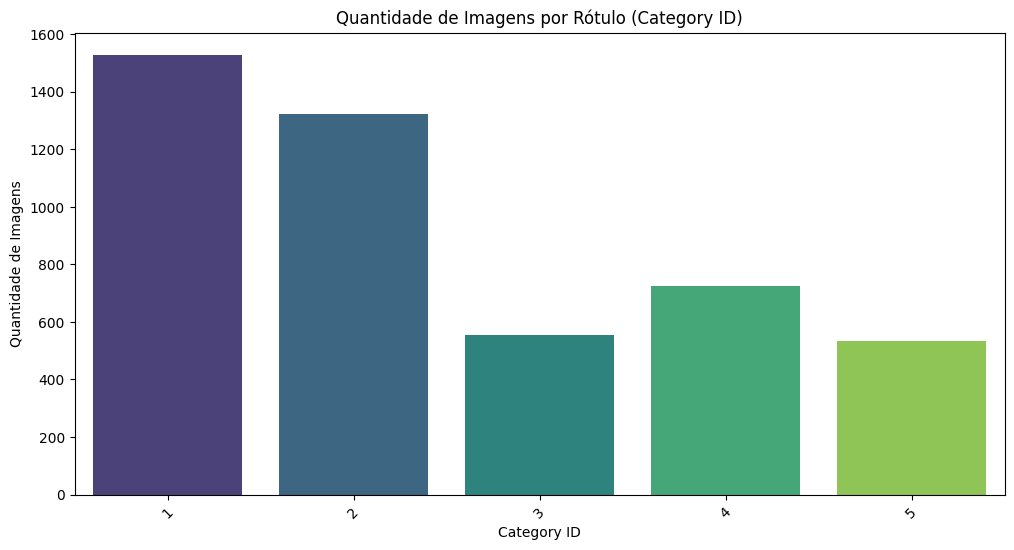

In [6]:
# Dicionário para contar a quantidade de imagens para cada rótulo
image_count_by_category = defaultdict(set)

# Iterar pelas anotações para contar os image_ids por category_id
for annotation in data['annotations']:
    category_id = annotation['category_id']
    image_id = annotation['image_id']
    image_count_by_category[category_id].add(image_id)

# Converter contagem de sets para número de imagens
image_count_by_category = {category_id: len(image_ids) for category_id, image_ids in image_count_by_category.items()}

# Preparar dados para o gráfico
categories = list(image_count_by_category.keys())
image_counts = list(image_count_by_category.values())

# Criar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=categories, y=image_counts, palette='viridis')
plt.title('Quantidade de Imagens por Rótulo (Category ID)')
plt.xlabel('Category ID')
plt.ylabel('Quantidade de Imagens')
plt.xticks(rotation=45)
plt.show()

Percebe-se que a maioria das imagens estão concentradas entre gatos e cachorros podendo interferir caso seja usao por exemplo em um modelo de classificação

In [7]:
# Função para encontrar anotações com um determinado category_id e salvá-las em um dicionário
def find_annotations_with_category_id(obj, category_id):
    filtered_annotations = {}
    if isinstance(obj, dict) and 'annotations' in obj:
        annotations = obj['annotations']
        for annotation in annotations:
            if annotation.get('category_id') == category_id:
                image_id = annotation['image_id']
                if image_id not in filtered_annotations:
                    filtered_annotations[image_id] = []
                filtered_annotations[image_id].append(annotation)
    return filtered_annotations

# Procurar por anotações com category_id = 5 no JSON
filter_categorie_dog = find_annotations_with_category_id(data, 1)
filter_categorie_cat = find_annotations_with_category_id(data, 2)
filter_categorie_sheep = find_annotations_with_category_id(data, 3)
filter_categorie_horse = find_annotations_with_category_id(data, 4)
filter_categorie_cow = find_annotations_with_category_id(data, 5)

In [8]:
# Supondo que `filter_categorie_cow` é um dicionário que mapeia image_ids para anotações

# Obter image_ids das anotações filtradas
image_ids_dogs = set(filter_categorie_dog.keys())
image_ids_cats = set(filter_categorie_cat.keys())
image_ids_sheeps = set(filter_categorie_sheep.keys())
image_ids_horses = set(filter_categorie_horse.keys())
image_ids_cows = set(filter_categorie_cow.keys())

# Função para filtrar as imagens com base nos image_ids obtidos e retornar a lista de nomes de arquivos
def find_image_filenames_by_ids(obj, image_ids):
    image_filenames = []
    if isinstance(obj, dict) and 'images' in obj:
        images = obj['images']
        for image_id in image_ids:
            if str(image_id) in images:
                image_filenames.append(images[str(image_id)])
    return image_filenames

# Obter os nomes dos arquivos de imagem correspondentes aos image_ids
dogs = find_image_filenames_by_ids(data, image_ids_dogs)
cats = find_image_filenames_by_ids(data, image_ids_cats)
sheeps = find_image_filenames_by_ids(data, image_ids_sheeps)
horses = find_image_filenames_by_ids(data, image_ids_horses)
cows = find_image_filenames_by_ids(data, image_ids_cows)


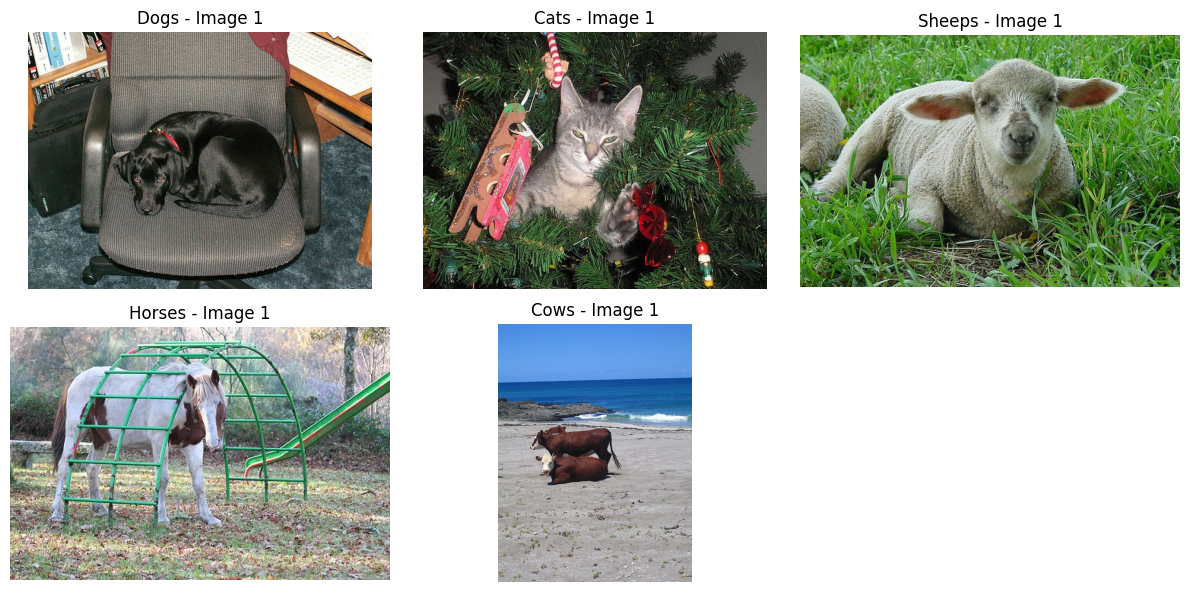

In [9]:
# Função para encontrar o nome do arquivo da imagem pelo ID
def find_image_filenames_by_ids(data, image_ids):
    filenames = []
    for id in image_ids:
        filenames.append(data[id]['filename'])  # Supondo que data é um dicionário com os IDs como chaves
    return filenames

# Função para plotar todas as primeiras imagens juntas em uma única grade
def plot_first_images_together(dogs, cats, sheeps, horses, cows):
    plt.figure(figsize=(12, 6))
    categories = [dogs, cats, sheeps, horses, cows]
    titles = ["Dogs", "Cats", "Sheeps", "Horses", "Cows"]
    for i, category in enumerate(categories):
        if not category:
            print(f"Não há imagens de {titles[i]}")
            continue
        img_path = os.path.join(IMG_PATH, category[0])  # Obtém o caminho completo da primeira imagem de cada categoria
        img = Image.open(img_path)
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(f"{titles[i]} - Image 1")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# Plotar todas as primeiras imagens juntas em uma única grade
plot_first_images_together(dogs, cats, sheeps, horses, cows)


# Filtrar imagens dos bovinos

In [10]:
# Diretório onde as imagens estão armazenadas
# Importar e carregar as imagens
loaded_images = []
for filename in cows:
  image_path = os.path.join(IMG_PATH, filename)
  if os.path.exists(image_path):
    img = Image.open(image_path)
    loaded_images.append(img)

In [11]:
len(loaded_images)

534

Das 4000 imagens apenas 534 representam bovinos

In [12]:
first_image_array = np.array(loaded_images[533])
first_image_array.shape

test = [0, 10, 20, 100, 200, 300, 400, 500]

for i in test:
  t = np.array(loaded_images[i])
  print(t.shape)

(500, 375, 3)
(375, 500, 3)
(360, 480, 3)
(299, 448, 3)
(375, 500, 3)
(332, 500, 3)
(190, 300, 3)
(225, 300, 3)


Os tamanhos das imagens variam muito sendo necessário uma padronizar.

In [31]:
# Função para redimensionar uma imagem para 100x100
def resize_image(img):
    return img.resize((100, 100))

# Lista para armazenar as imagens redimensionadas
resized_images_cows = []

# Importar e redimensionar as imagens
for filename in cows:
    image_path = os.path.join(IMG_PATH, filename)
    if os.path.exists(image_path):
        img = Image.open(image_path)
        img_resized = resize_image(img)
        resized_images_cows.append(np.array(img_resized))  # Convertendo a imagem redimensionada para um array numpy
    else:
        print(f"Arquivo não encontrado: {image_path}")

# Exemplo de uso:
# Usar as imagens redimensionadas conforme necessário
for i in range(len(resized_images_cows)):
    t = resized_images_cows[i]

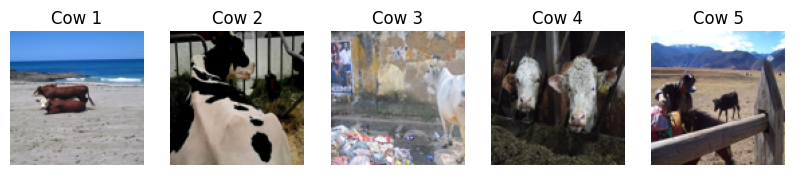

In [14]:
# Plota 5 imagens redimensionadas de vacas
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(resized_images_cows[i])
    plt.title('Cow ' + str(i+1))
    plt.axis('off')
plt.show()


Todas as imagens de bovinos agora tem a dimensão (100,100,3)

In [22]:
# Função para desenhar a caixa delimitadora em torno dos keypoints em uma imagem
def draw_keypoint_boxes(image, keypoints):
    img_with_boxes = np.array(image)  # Convertendo a imagem PIL para NumPy array
    for keypoint in keypoints:
        for kp in keypoint['keypoints']:
            x, y, v = kp  # Coordenadas do ponto chave e visibilidade
            if v != 0:  # Se o ponto chave estiver visível
                # Desenhar um círculo ao redor do ponto chave
                cv2.circle(img_with_boxes, (int(x), int(y)), 3, (0, 255, 0), -1)
    return img_with_boxes

Função para desenhar os keypoints

In [28]:
# Selecionar aleatoriamente 5 imagens das imagens carregadas
sample_indices = random.sample(range(len(loaded_images)), min(5, len(loaded_images)))
sample_images = [loaded_images[i] for i in sample_indices]

# Plotar as imagens selecionadas com keypoints
for i, img in zip(sample_indices, sample_images):
    # Obter as anotações correspondentes à imagem
    image_id = i + 1  # Assumindo que os IDs das imagens começam em 1
    if image_id in filter_categorie_cow:
        annotations = filter_categorie_cow[image_id]
        img_with_boxes = draw_keypoint_boxes(img, annotations)
        plt.imshow(img_with_boxes)
        plt.axis('off')
        plt.show()
    else:
        print(f"Nenhuma anotação encontrada para a imagem com ID {image_id}")

Nenhuma anotação encontrada para a imagem com ID 203
Nenhuma anotação encontrada para a imagem com ID 416
Nenhuma anotação encontrada para a imagem com ID 471
Nenhuma anotação encontrada para a imagem com ID 257
Nenhuma anotação encontrada para a imagem com ID 417


In [30]:
def draw_cow_keypoints(loaded_images, filter_categorie_cow):
    for annotations in filter_categorie_cow.values():
        for annotation in annotations:
            image_id = annotation['image_id']
            if image_id < len(loaded_images):
                img = loaded_images[image_id - 1]  # Subtraindo 1 pois os índices começam de 0
                img_with_boxes = draw_keypoint_boxes(img, [annotation])
                plt.imshow(img_with_boxes)
                plt.axis('off')
                plt.show()


Percebe-se que nem todas as imagens contém keypoints, que são pontos chaves que podem identificar o rosto, corpo ou partes específicas. Podendo detectar movimento em modelos de visão computacional